# Neural Networks

Neural networks, also known as artificial neural networks (ANNs) or simulated neural networks (SNNs), are a subset of machine learning and are at the heart of deep learning algorithms. Their name and structure are inspired by the human brain, mimicking the way that biological neurons signal to one another.

Made Up of Layers

- Input Layer (Accepts Raw data)
    * Example for a 28 by 28 image we need 28x28=784 pixel input
- Number of input/s -> Number of neuron/s in input layer
- Hidden layers -> <- interconnected neurons with weights <- Trainable Parameters ->
    * biases <-> densly connected, doesn't take any input. Generally weight = 1. <-they donot interconnect-><-trainable->
- Output layer -> Classification -> Number of Classes -> one value -> [0, 1] -> probability || Number of classes
    * Or prediction

$$\sum_{i=0}^{n}w_i*x_i + b$$

- Activation functions -> output or somewhere mid -> some float -> [0,1]
    * sigmod [0,1]
    * tanh   [-1, 1]
    * ReLU - Rectified Linear Units

$$N_1 = F(\sum_{i=0}^{n}w_i * x_i + b)$$

$$sigmoid(N_1) = sigmoid(F(\sum_{i=0}^{n}w_i * x_i + b))$$

- Loss Functions -> how far away was our value from original <- Cost Funtions->
    * tweaking the weights <-> feedback rerun
    * Mean Squared Error
    * Mean Absolute Error
    * Hinge Loss 

#### Mean Absolute Error

$$mae = \sum_{i=1}^{n}abs(y - \lambda(x_i)/n$$

#### Mean Squared Error

$$ MSE = (1/n) * \sum_{i=1}^{n} (Y_i - y_i)^2 $$

#### Optimizers - Backpropagation and update weights, reduce loss

- Gradient Descent
- Stochastic gradient descent
- Mini-Batch Gradient descent
- Momentum
- Nesterov Accelarated Gradient

## Creating the model

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

### Dataset - MNIST Fashion

60,000 images for training and 10,000 for validation/testing

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() # split

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_images[0,23,23]

194

In [5]:
type(train_images)

numpy.ndarray

In [6]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

pixel 0-255
- 0 black
- 255 white

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', \
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

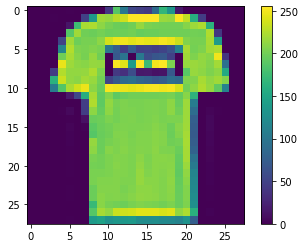

In [8]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

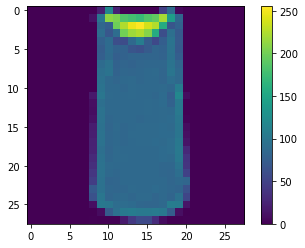

In [9]:
plt.figure()
plt.imshow(train_images[2])
plt.colorbar()
plt.grid(False)
plt.show()

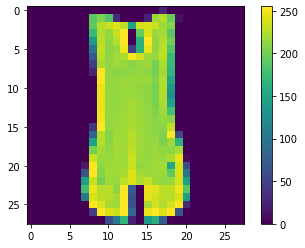

In [10]:
plt.figure()
plt.imshow(train_images[4])
plt.colorbar()
plt.grid(False)
plt.show()

### Data Preprocessing

In [11]:
train_images = train_images / 255.0
test_images = test_images / 255.0

### Building the model

In [12]:
model = keras.Sequential([ \
                         keras.layers.Flatten(input_shape=(28, 28)), \
                         keras.layers.Dense(128, activation='relu'), \
                         keras.layers.Dense(10, activation='softmax') \
                         ])

### Compiling the model

In [13]:
model.compile(optimizer = 'adam', \
             loss = 'sparse_categorical_crossentropy', \
             metrics=['accuracy'])

### Training the Model

In [14]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5009 - accuracy: 0.8265
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3782 - accuracy: 0.8635
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3388 - accuracy: 0.8761
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3137 - accuracy: 0.8845
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2975 - accuracy: 0.8899: 0s - loss: 0.2975 - accu
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2802 - accuracy: 0.8965
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2683 - accuracy: 0.9007: 0s - l
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2589 - accuracy: 0.9039
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2487 - accuracy: 0.9076
Epoch 10/10
1875/1875 [=========================

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
print('Test Accuracy: ', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3374 - accuracy: 0.8849
Test Accuracy:  0.8848999738693237


<<<___LITTLE__OVERFITTING___>>>

#### Train with less epochs

In [16]:
model.fit(train_images, train_labels, epochs=8)
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
print('Test Accuracy: ', test_acc)

Epoch 1/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2323 - accuracy: 0.9127
Epoch 2/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2235 - accuracy: 0.9165
Epoch 3/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2158 - accuracy: 0.9194
Epoch 4/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2119 - accuracy: 0.9199
Epoch 5/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2044 - accuracy: 0.9237
Epoch 6/8
1875/1875 [==============================] - ETA: 0s - loss: 0.1990 - accuracy: 0.92 - 5s 3ms/step - loss: 0.1990 - accuracy: 0.9259
Epoch 7/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1927 - accuracy: 0.9277
Epoch 8/8
313/313 [==============================] - 1s 2ms/step - loss: 0.3553 - accuracy: 0.8854
Test Accuracy:  0.8853999972343445


#### Train with even more less epochs

In [18]:
model.fit(train_images, train_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
print('Test Accuracy: ', test_acc)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1844 - accuracy: 0.9306
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1791 - accuracy: 0.9335
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1727 - accuracy: 0.9358
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1693 - accuracy: 0.9368
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3902 - accuracy: 0.8804
Test Accuracy:  0.8804000020027161


### Predicting

In [24]:
test_images.shape

(10000, 28, 28)

In [19]:
predictions = model.predict(test_images)

In [20]:
predictions[0]

array([4.0516813e-12, 1.6673416e-16, 1.0949912e-19, 1.7877695e-20,
       3.9171064e-15, 4.2125345e-07, 6.9876369e-14, 9.0484442e-05,
       4.3916896e-15, 9.9990904e-01], dtype=float32)

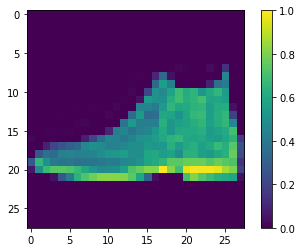

Ankle Boot


In [26]:
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()
print(class_names[np.argmax(predictions[0])])

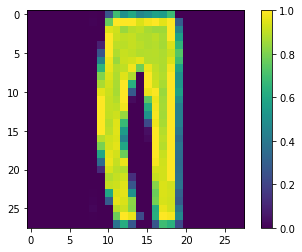

Trouser


In [27]:
plt.figure()
plt.imshow(test_images[2])
plt.colorbar()
plt.grid(False)
plt.show()
print(class_names[np.argmax(predictions[2])])

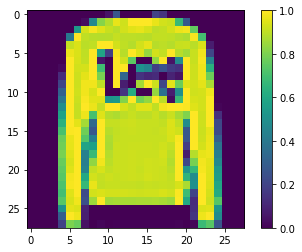

Pullover


In [28]:
plt.figure()
plt.imshow(test_images[1])
plt.colorbar()
plt.grid(False)
plt.show()
print(class_names[np.argmax(predictions[1])])